<div style="background-color: black; color: white; padding: 10px;text-align: center;">
  <strong>Date Published:</strong> December 3, 2025 <strong> | </strong><strong>Author: </strong> Adnan Alaref
</div>

# 🫁 Pneumonia Chest X-Ray Dataset  
A clean and well-organized dataset for **binary classification** of chest X-ray images into **NORMAL** and **PNEUMONIA** categories.

---

## 📂 Dataset Structure

The dataset is organized into three standard machine-learning splits:

```plaintext
train/
    NORMAL/
    PNEUMONIA/
test/
    NORMAL/
    PNEUMONIA/
val/
    NORMAL/
    PNEUMONIA/
```
---

## 📊 Image Counts

### **📌 Training Set (`train/train`)**
- **NORMAL:** 1,341 images  
- **PNEUMONIA:** 3,875 images  
- **Total:** 5,216 images  

### **📌 Test Set (`test/test`)**
- **NORMAL:** 234 images  
- **PNEUMONIA:** 390 images  
- **Total:** 624 images  

### **📌 Validation Set (`val/val`)**
- **NORMAL:** 8 images  
- **PNEUMONIA:** 8 images  
- **Total:** 16 images  

---

## 🎯 Purpose

This dataset is ideal for:

- Training deep learning models for **pneumonia detection**  
- Comparing CNN / transfer learning architectures  
- Educational projects in **medical imaging**  
- Benchmarking binary classification pipelines  

---

## ⚠️ Notes & Considerations

- **Class imbalance:** Pneumonia images are ~3× more common in the training set.  
  Consider using:
  - Class weights  
  - Oversampling  
  - Data augmentation  

- **Image variability:** Images vary in contrast and resolution.  
  Apply standard preprocessing (resizing, normalization).

- **Binary labels only:** The dataset does **not** distinguish between pneumonia subtypes.

---

## 🧪 Recommended Preprocessing

- Resize images (e.g., `224×224` or `299×299`)  
- Normalize pixel values  
- Use augmentations such as:  
  - Random rotation  
  - Horizontal flip  
  - Contrast/brightness adjustment  

---

## 🚀 Example Use Cases

- Build a CNN classifier (PyTorch / TensorFlow)  
- Fine-tune pretrained models like ResNet, EfficientNet, MobileNet  
- Perform explainability analysis (Grad-CAM)  
- Create a pneumonia detection demo app  

---

## 📝 Summary

This dataset provides a structured and clinically meaningful collection of chest X-ray images prepared for machine-learning workflows.  
It serves as a solid foundation for research, experimentation, and educational projects in medical AI.

# <a id="Import"></a><div style="background: linear-gradient(to right, #1b5e20, #2e7d32, #388e3c, #43a047, #4caf50); font-family: 'Times New Roman', serif; font-size: 28px; font-weight: bold; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">Step 1: Import Library.</div>

In [7]:
import os
import cv2
import random
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

# <a id="Import"></a><div style="background: linear-gradient(to right, #1b5e20, #2e7d32, #388e3c, #43a047, #4caf50); font-family: 'Times New Roman', serif; font-size: 28px; font-weight: bold; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">Step 2: Count Images In Each Folder.</div>

In [10]:
def count_images(path):
    return len([f for f in os.listdir(path) if f.endswith((".jpg", ".png", ".jpeg"))])

root = r"/kaggle/input/pneumonia-chest-xray/chest_xray"

splits = ["train/train", "test/test", "val/val"]
classes = ["NORMAL", "PNEUMONIA"]

for split in splits:
    print(f"\n📌Split: {split}")
    for cls in classes:
        folder = os.path.join(root, split, cls)
        print(f"        {cls}: {count_images(folder)} images")


📌Split: train/train
        NORMAL: 1341 images
        PNEUMONIA: 3875 images

📌Split: test/test
        NORMAL: 234 images
        PNEUMONIA: 390 images

📌Split: val/val
        NORMAL: 8 images
        PNEUMONIA: 8 images


# <a id="Import"></a><div style="background: linear-gradient(to right, #1b5e20, #2e7d32, #388e3c, #43a047, #4caf50); font-family: 'Times New Roman', serif; font-size: 28px; font-weight: bold; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">Step 3: Plot Image Counts per Split.</div>

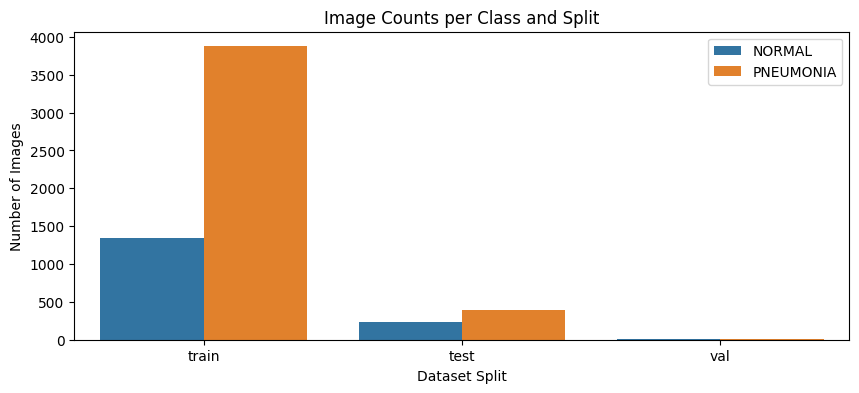

In [13]:
root = r"/kaggle/input/pneumonia-chest-xray/chest_xray"
splits = ["train/train", "test/test", "val/val"]
classes = ["NORMAL", "PNEUMONIA"]

# Count images
counts = {split: {} for split in splits}
for split in splits:
    for cls in classes:
        folder = os.path.join(root, split, cls)
        counts[split][cls] = len([f for f in os.listdir(folder) if f.endswith((".jpg", ".png", ".jpeg"))])

# Prepare data for plotting
split_names = []
class_names = []
num_images = []

for split in splits:
    for cls in classes:
        split_names.append(split.split('/')[-1])
        class_names.append(cls)
        num_images.append(counts[split][cls])

# Plot
plt.figure(figsize=(10,4))
sns.barplot(x=split_names, y=num_images, hue=class_names)
plt.title("Image Counts per Class and Split")
plt.xlabel("Dataset Split")
plt.ylabel("Number of Images")
plt.show()

# <a id="Import"></a><div style="background: linear-gradient(to right, #1b5e20, #2e7d32, #388e3c, #43a047, #4caf50); font-family: 'Times New Roman', serif; font-size: 28px; font-weight: bold; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">Step 4: Display Sample Images from Each Class.</div>

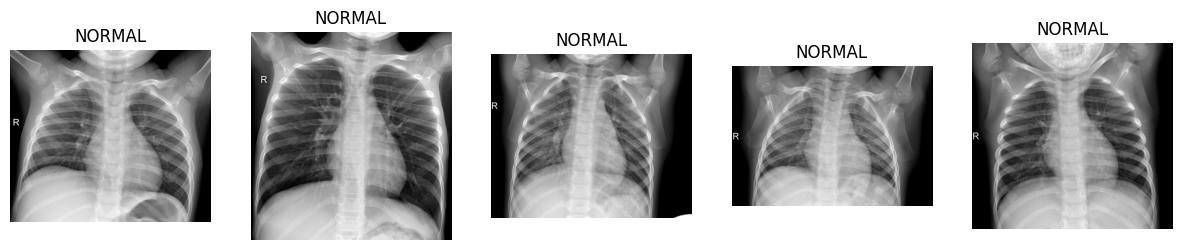

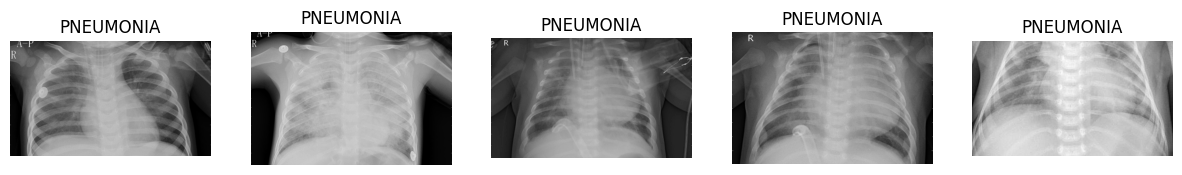

In [9]:
# Function to show sample images
def show_samples(split, cls, n=5):
    folder = os.path.join(root, split, cls)
    files = os.listdir(folder)
    samples = random.sample(files, n)
    
    plt.figure(figsize=(15,3))
    for i, file in enumerate(samples):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{cls}")
        plt.axis('off')
    plt.show()

# Show examples
show_samples("train/train", "NORMAL")
show_samples("train/train", "PNEUMONIA")

# <a id="Import"></a><div style="background: linear-gradient(to right, #1b5e20, #2e7d32, #388e3c, #43a047, #4caf50); font-family: 'Times New Roman', serif; font-size: 28px; font-weight: bold; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">Thanks & Upvote ❤️</div>